# MINI-PROJECT
Gao Yiming - U2222056C & Zuo Zhiyi - U2222287D

## 1. Introduction

This main purpose of the mini-project is to find factors that can be used to predict whether a flight's arrival time will be delayed or not, and further find appropriate models using these variables to predict whether the flight's arrival time will be delayed or not. 

All of the data covered in this mini-project are in the CSV file "DelayedFlights". Data in this CSV file is gathered by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) in 2008, and can be downloaded on https://www.kaggle.com/datasets/giovamata/airlinedelaycauses. 

## 2. Essential Librarys

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics
%matplotlib inline

## 3. Data Cleaning

### 3.1. Dataset Set Up

In [2]:
# import the CSV data
data = pd.read_csv('./Datasets/DelayedFlights.csv')

# Replace values in ArrDelay by 0 & 1 according to their sign
data['ArrDelay'] = (data['ArrDelay'] > 0).astype(int)

data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           int32  
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

#### The dataset used consists of the following variables: 

`Year` 2008

`Month` 1-12

`DayofMonth` 1-31

`DayOfWeek` 1 (Monday) - 7 (Sunday)

`DepTime` actual departure time (local, hhmm)

`CRSDepTime` scheduled departure time (local, hhmm)

`ArrTime` actual arrival time (local, hhmm)

`CRSArrTime` scheduled arrival time (local, hhmm)

`UniqueCarrier` unique carrier code

`FlightNum` flight number

`TailNum` plane tail number: aircraft registration, unique aircraft identifier

`ActualElapsedTime` in minutes

`CRSElapsedTime` estimated elapse time, in minutes

`AirTime` in minutes

`ArrDelay` arrival delay,0 represents not delayed while 1 represents delayed

`DepDelay` departure delay, in minutes

`Origin` origin IATA airport code

`Dest` destination IATA airport code

`Distance` in miles

`TaxiIn` taxi in time, in minutes

`TaxiOut` taxi out time in minutes

`Cancelled` was the flight cancelled

`CancellationCode` reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

`Diverted` 1 = yes, 0 = no

`CarrierDelay` in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

`WeatherDelay` in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

`NASDelay` in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.

`SecurityDelay` in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

`LateAircraftDelay`in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [4]:
# Drop the first column because it is meaningless
data = data.drop(data.columns[0],axis = 1)

The number of rows for the datasets is too big to analyse, only data for the Januaury will be kept.

In [5]:
# Keep the data for January. 
data = data[data.iloc[:, 1] == 1]
print("Now, the number of rows of the cleared data set is",str(len(data)),".")

Now, the number of rows of the cleared data set is 183527 .


The objective of this project is to predict if a flight's arrival time will be delayed or not using some related variables. Since values in `Arrdelay` represent the exact time delay in minutes, they are converted into 0s (representing no delay) and 1s (representing delay) for better anlysis.

### 3.2. Missing Values Handling

In [6]:
# Check if there are missing values for all of the variables
data.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                612
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      612
CRSElapsedTime          35
AirTime                612
ArrDelay                 0
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 612
TaxiOut                  0
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         62741
WeatherDelay         62741
NASDelay             62741
SecurityDelay        62741
LateAircraftDelay    62741
dtype: int64

For higher accuracy, variables `Carrier Delay`, `WeatherDelay`, `NASDelay`, `SecurityDelay` and `LateAircraftDelay` are removed because there are too many missing values. 

In [7]:
# Delete variables CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay (too many missing values)
data = data.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'],axis = 1)


In [8]:
# Null value imputation by Interpolation method
data = data.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction=None, limit_area=None, downcast=None)
data.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
dtype: int64

### 3.3. Value Checking

In [9]:
# Check if there are negative values for variables ArrTime, CRSEArrTime, DepTime and CRSEDepTime
print("ArrTime:",all(i < 0 for i in data['ArrTime']))
print("CRSArrTime:",all(i < 0 for i in data['CRSArrTime']))
print("DepTime:",all(i < 0 for i in data['DepTime']))
print("CRSDepTime:",all(i < 0 for i in data['CRSDepTime']))

ArrTime: False
CRSArrTime: False
DepTime: False
CRSDepTime: False


In [10]:
# Check if there are columns having a constant value rather than different values
unique_values = data.nunique()
print(unique_values[unique_values == 1])

Year                1
Month               1
Cancelled           1
CancellationCode    1
dtype: int64


In [11]:
# Remove columns with a constant value
data = data.drop(['Year','Month','Cancelled','CancellationCode'],axis = 1)

Variables `FlightNum` and `TailNum` seem to be irrelavent to `ArrDelay`. They are also removed from the dataset. 

Additionally, by observing data in the original csv file, all of the float values in the dataset can be convert to integers without any change of their values.

In [12]:
# Convert float values into integers
data['DepTime'] = data['DepTime'].astype(int)
data['ArrTime'] = data['ArrTime'].astype(int)
data['ActualElapsedTime'] = data['ActualElapsedTime'].astype(int)
data['CRSElapsedTime'] = data['CRSElapsedTime'].astype(int)
data['AirTime'] = data['AirTime'].astype(int)
data['ArrDelay'] = data['ArrDelay'].astype(int)
data['DepDelay'] = data['DepDelay'].astype(int)
data['TaxiIn'] = data['TaxiIn'].astype(int)
data['TaxiOut'] = data['TaxiOut'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183527 entries, 0 to 183526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DayofMonth         183527 non-null  int64 
 1   DayOfWeek          183527 non-null  int64 
 2   DepTime            183527 non-null  int32 
 3   CRSDepTime         183527 non-null  int64 
 4   ArrTime            183527 non-null  int32 
 5   CRSArrTime         183527 non-null  int64 
 6   UniqueCarrier      183527 non-null  object
 7   FlightNum          183527 non-null  int64 
 8   TailNum            183527 non-null  object
 9   ActualElapsedTime  183527 non-null  int32 
 10  CRSElapsedTime     183527 non-null  int32 
 11  AirTime            183527 non-null  int32 
 12  ArrDelay           183527 non-null  int32 
 13  DepDelay           183527 non-null  int32 
 14  Origin             183527 non-null  object
 15  Dest               183527 non-null  object
 16  Distance           1

### 3.4. Outlier Detection & Removing

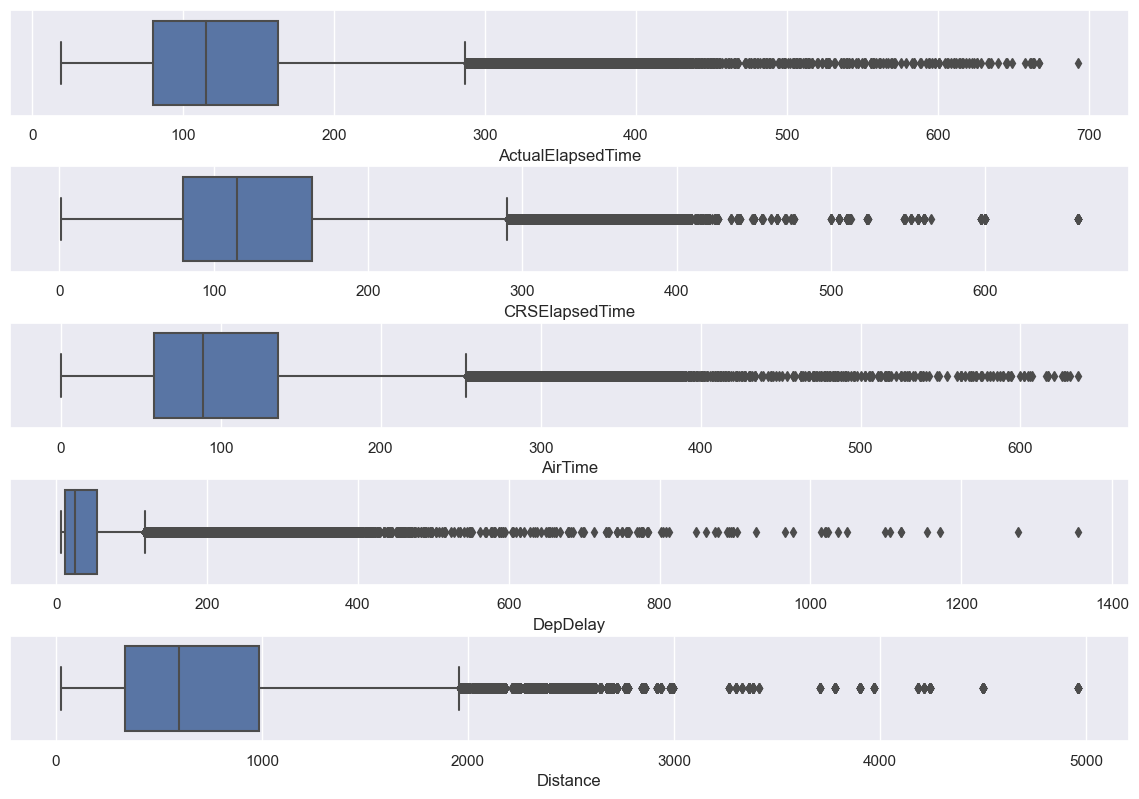

In [13]:
# Make box plot for variables which may have outliers
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 8))
fig.tight_layout()

sb.boxplot(data = data, x = 'ActualElapsedTime', orient = 'h', ax = axes[0])
sb.boxplot(data = data, x = 'CRSElapsedTime', orient = 'h', ax = axes[1])
sb.boxplot(data = data, x = 'AirTime', orient = 'h', ax = axes[2])
sb.boxplot(data = data, x = 'DepDelay', orient = 'h', ax = axes[3])
sb.boxplot(data = data, x = 'Distance', orient = 'h', ax = axes[4])

plt.show()

From the box-plots above, it is easy to see that variables `ActualElapsedTime`, `CRSElapsedTime`, `AirTime`, `DepDelay`, `Distance` have outliers. Hence, the following codes are prepared for outlier detection and removing. 

In [14]:
# Define the function used to detect the rows that contain outliers using z-scores
def detect_outliers(data):
    
    # Calculate the z-score for each column
    z_scores = np.abs((data - data.mean()) / data.std())
    
    # Find the rows where any column has a z-score greater than 3
    outliers = z_scores[(z_scores > 3).any(axis=1)].index
    
    return outliers

In [15]:
# Define the function used to remove the rows that contain outliers
def remove_outliers(data,outliers):
    new_data = data.drop(index = outliers)
    return new_data

In [16]:
# Set up a subset of the original cleaned dataset containing numeric variables which have outliers
data_o = data.loc[:,['ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance']]
data_o

,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Distance
0,128,150,116,8,810
1,128,145,113,19,810
2,96,90,76,8,515
3,90,90,77,34,515
4,101,115,87,25,688
...,...,...,...,...,...
183522,288,295,259,20,1946
183523,286,270,249,7,2172
183524,90,100,71,14,515
183525,124,115,87,207,585


In [17]:
# Outlier detection and deletion
outlier_i = detect_outliers(data_o)
data = remove_outliers(data,outlier_i)
print("After removing outliers, the number of rows of the cleared data set is",str(len(data)),".")

After removing outliers, the number of rows of the cleared data set is 175109 .


Finally, after removing the outliers, a cleaned dataset of 175109 rows is ready for further analysis. Now, the cleaning of dataset is done. The data set now contains 20 variables, in which `ArrDelay` is the response variable and others are potential preditors of it. 

## 4. Exploratory Data Analysis

In [18]:
# Sub-datasets set up
data_r = data[['ArrDelay']]
data_p = data.drop(['ArrDelay'],axis = 1)
data_cr = data[['DayofMonth','DayOfWeek','UniqueCarrier','FlightNum','TailNum','Origin','Dest','Diverted','ArrDelay']]
data_nr = data.drop(data_cr,axis = 1)
data_nr = data_nr.join(data_r)

### 4.1. Overview of the response variable

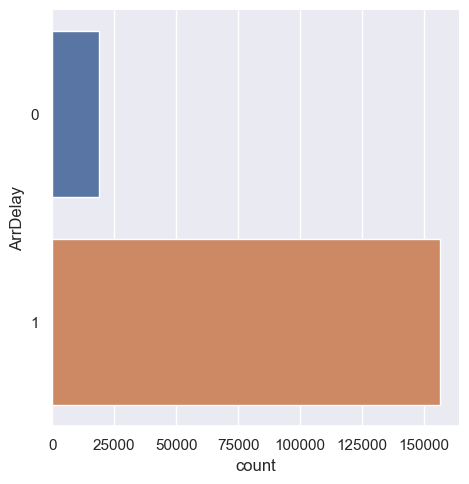

In [19]:
# Explore the response variable ArrDelay
sb.catplot(y = 'ArrDelay', data = data, kind = "count")

In [20]:
print("There are", str(data_r.value_counts()[0]), "0s in variable ArrDelay.")
print("There are", str(data_r.value_counts()[1]), "1s in variable ArrDelay.")

There are 18728 0s in variable ArrDelay.
There are 156381 1s in variable ArrDelay.


### 4.2. Overview of relationship for numeric variables and the response variable

<AxesSubplot:>

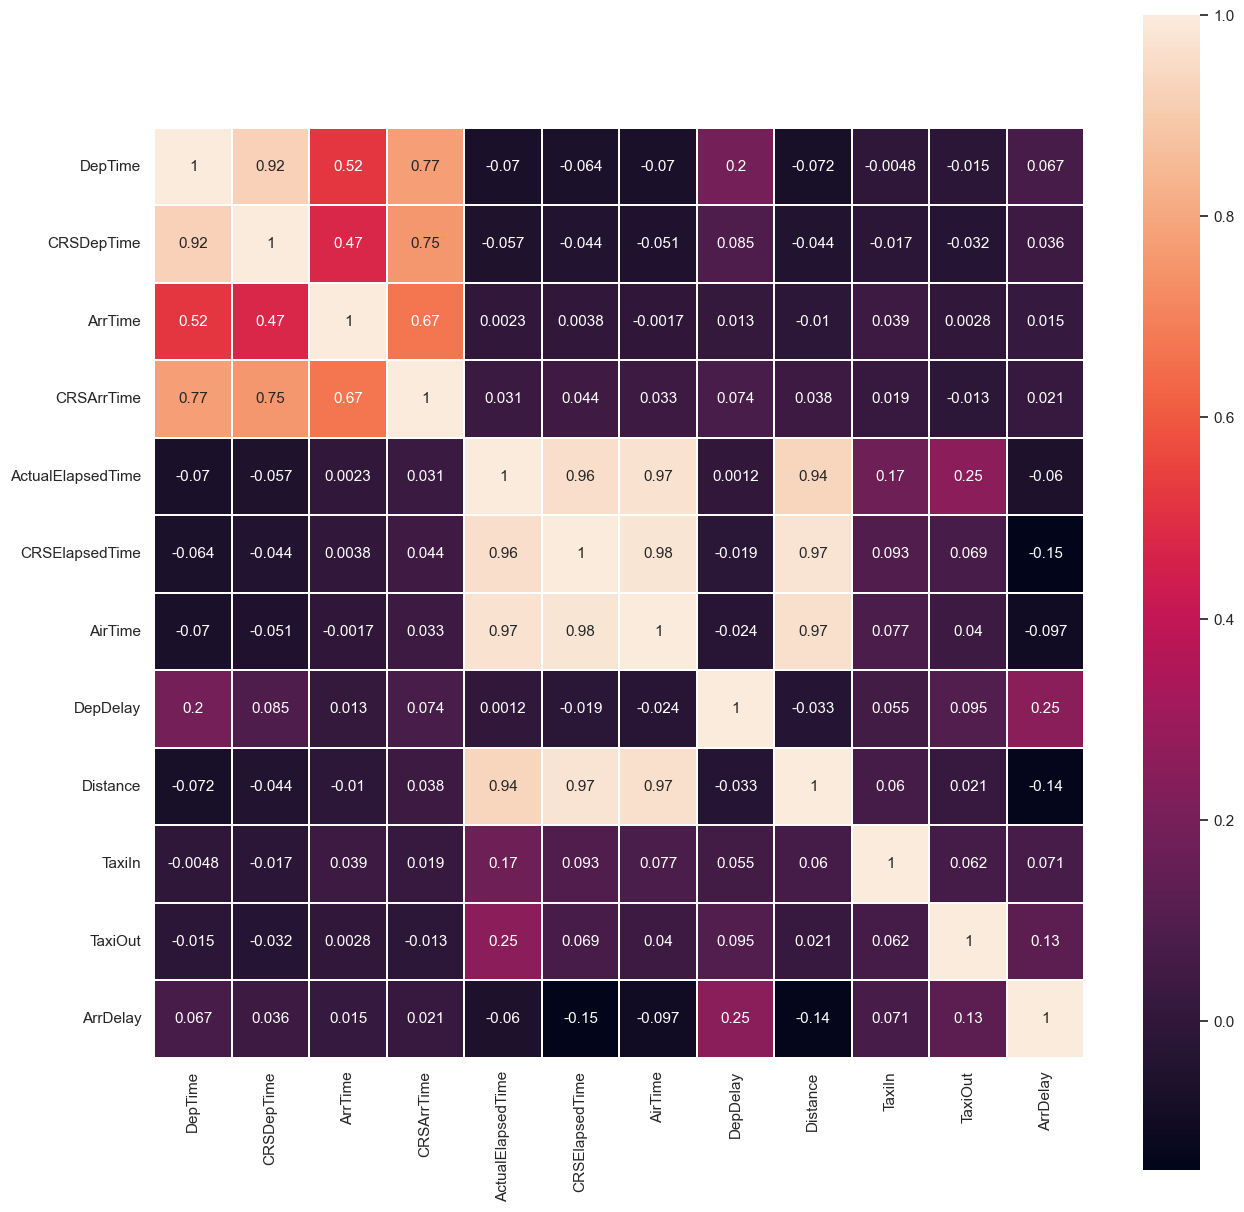

In [21]:
corr_mat = data_nr.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
sb.heatmap(corr_mat, square=True, annot=True, annot_kws={"size": 11}, linewidths=0.2)

According to the heat map above, it is easy to observe that:
- `DepDelay` is highly related to `ArrDelay`, which is reasonable and anticipated; 
- `CRSElapsedTime`, `Distance` and `TaxiOut` are also related to `ArrDelay`, but to a much lesser degree.

For further confirmation and analysis, violin plots of these four variables and `ArrDelay` are drawn below. 

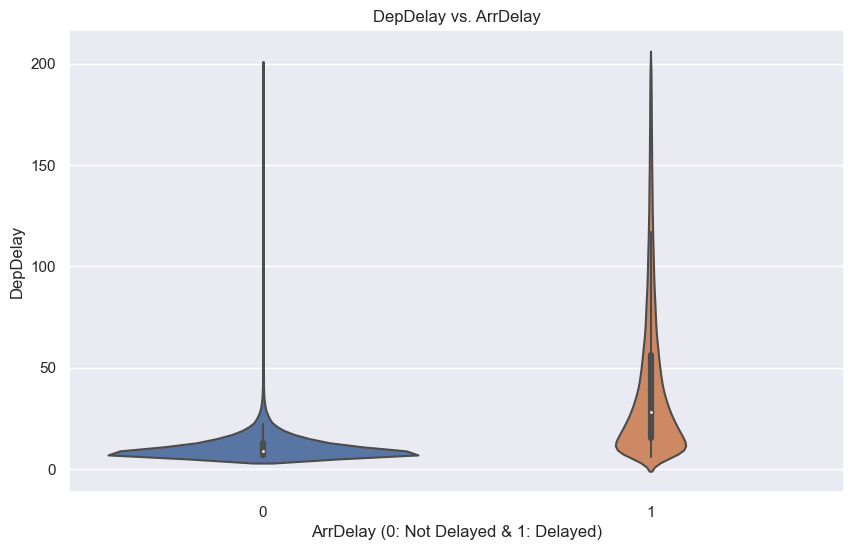

In [22]:
plt.figure(figsize = (10,6))
sb.violinplot(x = 'ArrDelay',y = 'DepDelay', data=data_nr,orient = 'v')
plt.title('DepDelay vs. ArrDelay')
plt.xlabel('ArrDelay (0: Not Delayed & 1: Delayed)')
plt.ylabel('DepDelay')
plt.show()

From the plot above, it can be observed that when the value of `DepDelay` is smaller than 20 (approximate), the `ArrDelay` is likely to be 0; when the value of `DepDelay` is larger than 20 (approximate), the `ArrDelay` is likely to be 1.

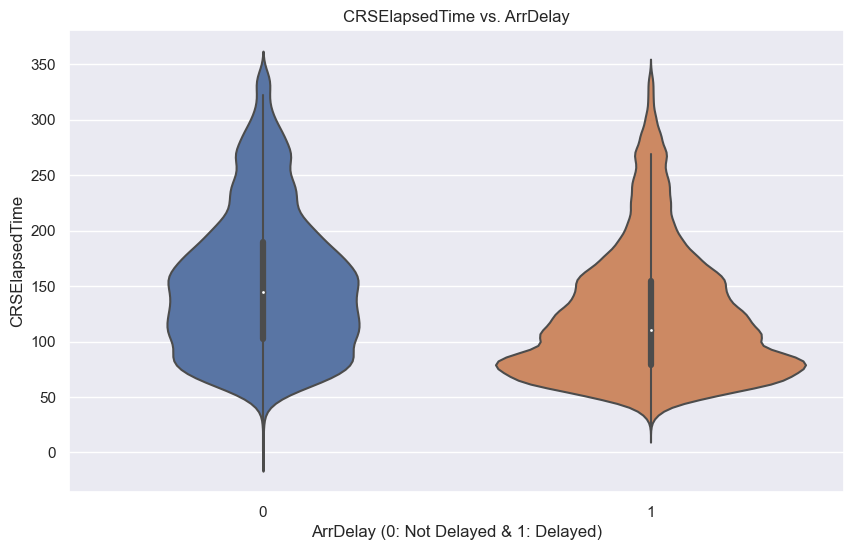

In [23]:
plt.figure(figsize = (10,6))
sb.violinplot(x = 'ArrDelay',y = 'CRSElapsedTime', data=data_nr,orient = 'v')
plt.title('CRSElapsedTime vs. ArrDelay')
plt.xlabel('ArrDelay (0: Not Delayed & 1: Delayed)')
plt.ylabel('CRSElapsedTime')
plt.show()

From the plot above, it can be observed that when the value of `CRSElapsedTime` is between 100 and 50 (approximate), the `ArrDelay` is likely to be 1; otherwise no obvious relationship between `CRSElapsedTime` and  `ArrDelay` can be found.

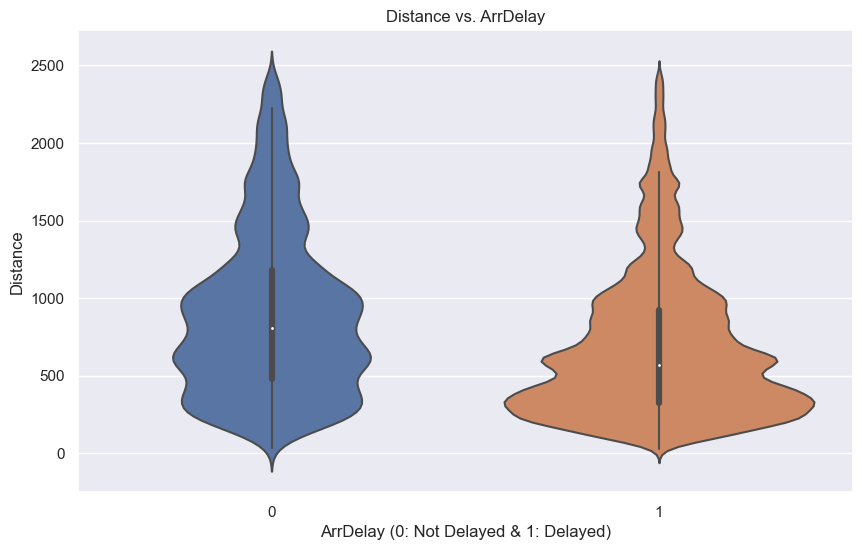

In [24]:
plt.figure(figsize = (10,6))
sb.violinplot(x = 'ArrDelay',y = 'Distance', data=data_nr,orient = 'v')
plt.title('Distance vs. ArrDelay')
plt.xlabel('ArrDelay (0: Not Delayed & 1: Delayed)')
plt.ylabel('Distance')
plt.show()

From the plot above, it can be observed that when the value of `Distance` is smaller than 500 (approximate), the `ArrDelay` is likely to be 1; otherwise no obvious relationship between `Distance` and `ArrDelay` can be found.

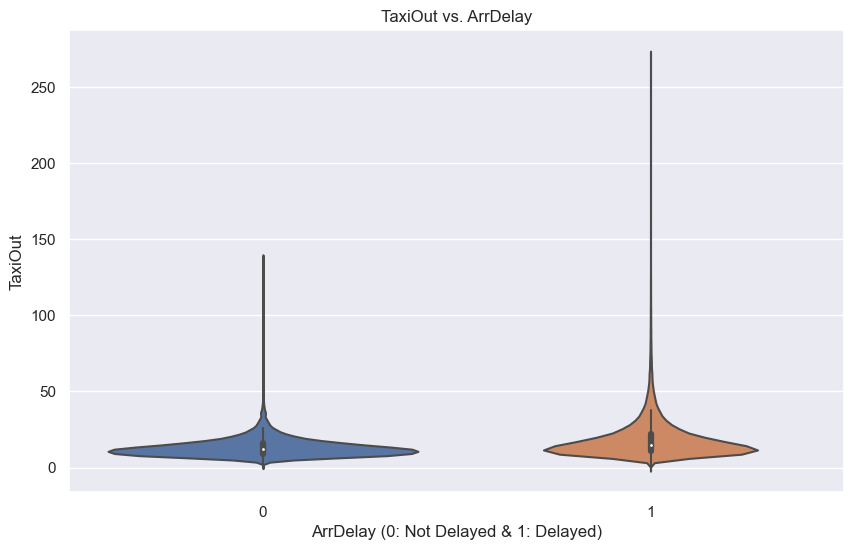

In [25]:
plt.figure(figsize = (10,6))
sb.violinplot(x = 'ArrDelay',y = 'TaxiOut', data=data_nr,orient = 'v')
plt.title('TaxiOut vs. ArrDelay')
plt.xlabel('ArrDelay (0: Not Delayed & 1: Delayed)')
plt.ylabel('TaxiOut')
plt.show()

From the plot above, it can be observed that when the value of `TaxiOut` is smaller than 25 (approximate), the `ArrDelay` is likely to be 0; otherwise no obvious relationship between `TaxiOut` and `ArrDelay` can be found.

As shown above, these four variables all have a discovered relationship with the response variable `ArrDelay`, but to different extent. Therefore, these four variables can be used as the preditors for the response variable `ArrDelay`.

### 4.3. Overview of relationship for categorical variables and the response variable

In [26]:
unique_c = {}

for col in data_cr.columns:
    unique_c[col] = data_cr[col].unique()

for key,value in unique_c.items():
    print("There are" , str(len(value)) , "of unique categories for variable", key + '.')

There are 31 of unique categories for variable DayofMonth.
There are 7 of unique categories for variable DayOfWeek.
There are 20 of unique categories for variable UniqueCarrier.
There are 6799 of unique categories for variable FlightNum.
There are 4781 of unique categories for variable TailNum.
There are 284 of unique categories for variable Origin.
There are 287 of unique categories for variable Dest.
There are 2 of unique categories for variable Diverted.
There are 2 of unique categories for variable ArrDelay.


By observing the dataset, none of the categorical variables seem to be relevant to the response variable `ArrDelay`. Although variables like `FlightNum`, `Origin` and `Dest` seem to be related to `ArrDelay` because the model of the plane and the weather patterns of places it goes through can affect the flight duration to some extent, there are too many categories in them that make them complex to analyse using the current knowledge learned (i.e. One Hot Method). Therefore, **only numeric variables** will be used for further modelling. 

### 4.4. Creating the predictors set

In [27]:
predictors = data[['DepDelay','TaxiOut','Distance','CRSElapsedTime']]

## 5. Modelling

In [28]:
# Import essensial functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [29]:
# Create a target variable


# Extract Predictors and Target
X = predictors
y = data_r['ArrDelay']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### 5.1. Attempt #1: RandomForestClassifier

In [30]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 4)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

# Predict the Response corresponding to ArrDelay
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

Train Data
Accuracy  :	 0.8956402558412739

TPR Train :	 0.9978533323589593
TNR Train :	 0.04174297924297924

FPR Train :	 0.9582570207570208
FNR Train :	 0.0021466676410406313


<AxesSubplot:>

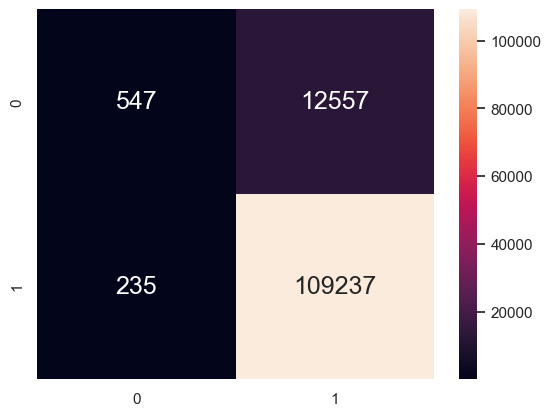

In [31]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8946186206765271

TPR Test :	 0.9974844912490141
TNR Test :	 0.03662873399715505

FPR Test :	 0.963371266002845
FNR Test :	 0.0025155087509859514


<AxesSubplot:>

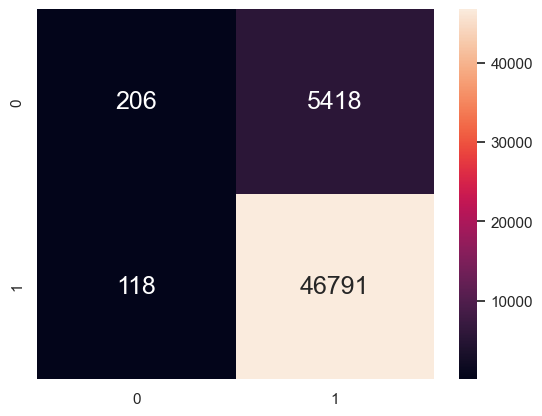

In [32]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t",rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test,y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
print("TNR Test :\t", (tnTest / (tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest / (tnTest + fpTest)))
print("FNR Test :\t", (fnTest / (tpTest + fnTest)))

# Plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

For both train and test dataset in this model, the accuracy is high enough (about 0.90). Their TPR are high (about 0.997) and their FNR are low (about 0.003). However, their TNRs are too low (about 0.04) while their FPRs are too high (about 0.96). Therefore, it is  important to make another model and try to maximize the TNR and minimize the FPR. 

### 5.2. Attempt #2: DecisionTreeClassifier

[Text(0.5, 0.9, 'DepDelay <= 14.5\ngini = 0.191\nsamples = 122576\nvalue = [13104, 109472]\nclass = Y'),
 Text(0.25, 0.7, 'TaxiOut <= 17.5\ngini = 0.405\nsamples = 37517\nvalue = [10576, 26941]\nclass = Y'),
 Text(0.125, 0.5, 'CRSElapsedTime <= 104.5\ngini = 0.456\nsamples = 25247\nvalue = [8900, 16347]\nclass = Y'),
 Text(0.0625, 0.3, 'DepDelay <= 8.5\ngini = 0.363\nsamples = 11391\nvalue = [2714, 8677]\nclass = Y'),
 Text(0.03125, 0.1, 'gini = 0.462\nsamples = 4667\nvalue = [1688, 2979]\nclass = Y'),
 Text(0.09375, 0.1, 'gini = 0.259\nsamples = 6724\nvalue = [1026, 5698]\nclass = Y'),
 Text(0.1875, 0.3, 'DepDelay <= 8.5\ngini = 0.494\nsamples = 13856\nvalue = [6186, 7670]\nclass = Y'),
 Text(0.15625, 0.1, 'gini = 0.495\nsamples = 5652\nvalue = [3112, 2540]\nclass = N'),
 Text(0.21875, 0.1, 'gini = 0.469\nsamples = 8204\nvalue = [3074, 5130]\nclass = Y'),
 Text(0.375, 0.5, 'CRSElapsedTime <= 139.5\ngini = 0.236\nsamples = 12270\nvalue = [1676, 10594]\nclass = Y'),
 Text(0.3125, 0.3, '

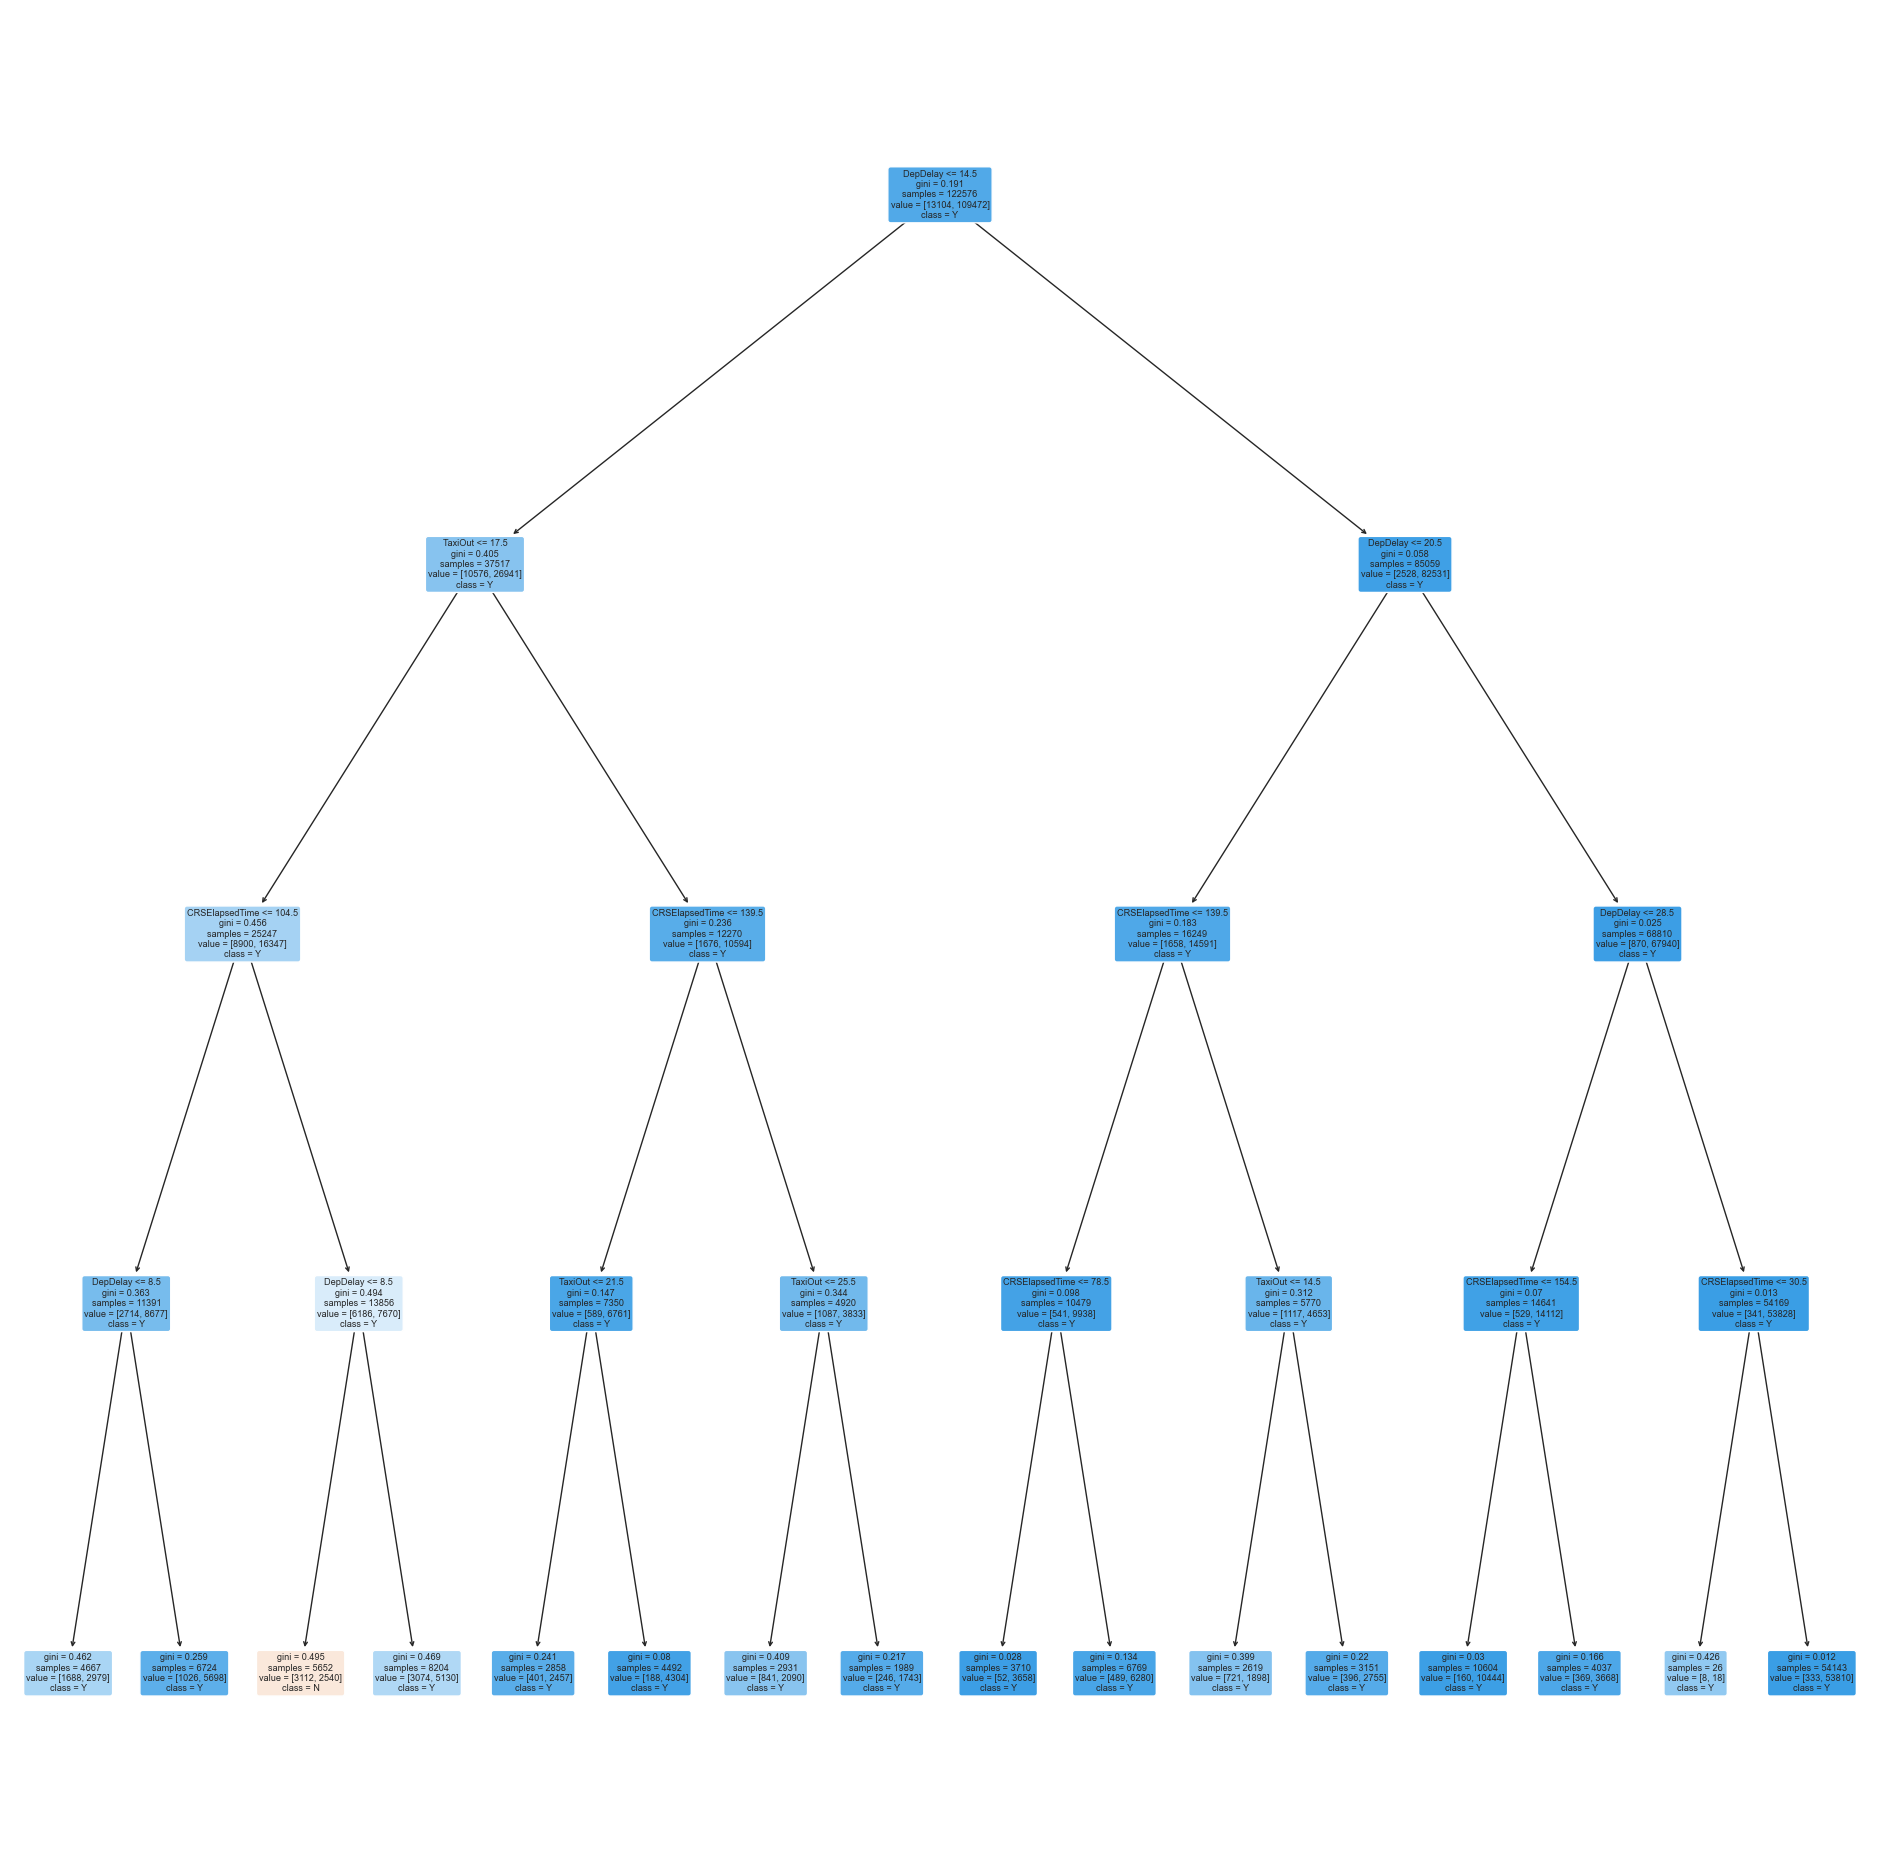

In [33]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)

# Predict Legendary values corresponding to ArrDelay
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree,filled=True,rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

The decision trees are readily made. Now, the following steps are done to check its accuracy. 

Train Data
Accuracy  :	 0.8977613888526302

TPR Train :	 0.9767977199649225
TNR Train :	 0.23748473748473747

FPR Train :	 0.7625152625152625
FNR Train :	 0.023202280035077464


<AxesSubplot:>

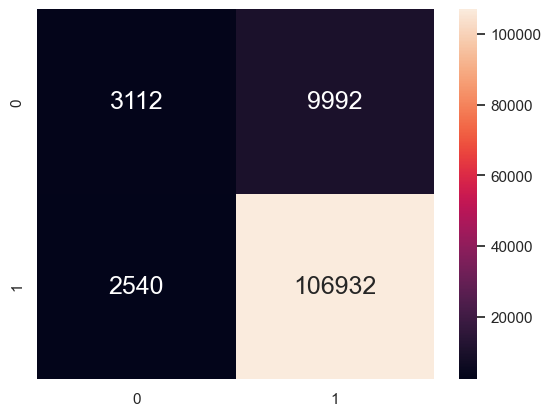

In [34]:
# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t",dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train,y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain / (tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain / (tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain / (tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain / (tpTrain + fnTrain)))

# Plot the confusion matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8960462947099919

TPR Test :	 0.9764224349271995
TNR Test :	 0.22564011379800852

FPR Test :	 0.7743598862019915
FNR Test :	 0.023577565072800528


<AxesSubplot:>

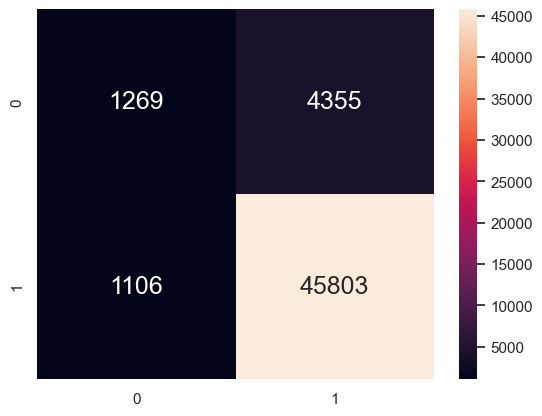

In [35]:
# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t",dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test,y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest / (tpTest + fnTest)))
print("TNR Test :\t", (tnTest / (tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest / (tnTest + fpTest)))
print("FNR Test :\t", (fnTest / (tpTest + fnTest)))

# Plot the confusion matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

For both train and test dataset in this model, the accuracy is also high enough (about 0.90). Their TPR are high (about 0.97) and their FNR are low (about 0.03). Although their TNR (about 0.25) are relatively lower than their TPR and their FPR (about 0.75) are relatively higher than their FNR, the results are much better than the previous model's. Hence, the decision tree classifier can be used as a model to predict whether a flight will be delayed or not according to the value of the flight's `DepDelay`, `CRSElapsedTime`, `Distance` and `TaxiOut`. 

## Conclusion

In this notebook, detailed exploratory data analysis (EDA)is presented. It can be concluded that the most important factors that affect whether a flight's arrival time is delayed or not are
- departure delay, in minutes (`DepDelay`)
- estimated elapse time, in minutes (`CRSElapsedTime`)
- distance between the origin and destination (`Distance`)
- taxi out time, in minutes (`TaxiOut`)

The significances of the above factors is first highlighted by EDA. 

In this notebook, detailed modelling of the predictors and response variable is presented. After attempting different models, an appropriate model (decision trees) that can be used to predict whether a flight's arrival time is delayed or not is found. 

However, there are still spaces for improvement. Recommondations are listed below. 

- To make the time and space complexity lower, this project only uses a small part of the CSV file for EDA and modelling. However, the subset of data used may not be representative of the population, leading to biased results. To have more accurate and unbiased predictions, a larger subset of the data in the CSV file are required to be used. 
- Only numeric predictors are used in the modelling part. However, some categorical variables can also play important roles in predicting the response variable `ArrDelay`. They can be discovered using by more advanced data analysis. 
- The decision-tree-based model may not be the best type of model in predicting `ArrDelay` using the four predictors. Better models for predicting `ArrDelay` are likely to be existed. 
- The higher the depth of the tree model, the more complex the model becomes, and it has the potential to capture more intricate patterns in the data. (However, a tree with a higher depth may also lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.)

In conclusion, by implementing the recommended strategies, we can achieve more accurate and unbiased predictions of whether a flight's arrival time will be delayed or not using relevant information about the flight itself.